## Problem - Customer Churn

We work for a fictitious telecommunications company 

One of the most important goals of the company is to increase customer loyalty. 

One strategy to achieve this goal is to identify customers who are likely to churn and approach them before they leave.

To do this, we'll look at historical customer data and see if we can develop a model that predicts churn based on various customer factors such as contract length, monthly payments, demographic information, etc.

This model would then help us to identify customers with a high risk of churn early enough so marketing could still address them e.g. with promotional packages.

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Get Data

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")
df = df.query("Contract == 'Month-to-month'")

## Training-Testing Split

In [3]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df.loc[:,['MonthlyCharges', 'tenure', 'SeniorCitizen']]
y = df['Churn']
y = y.map(dict(Yes=1, No=0))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y)

In [4]:
print(len(X_train), len(X_test))

3100 775


Inspect distribution of target in training and test set

In [5]:
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

Churn
0    0.572903
1    0.427097
Name: proportion, dtype: float64
Churn
0    0.572903
1    0.427097
Name: proportion, dtype: float64


### Model training with sklearn

In [7]:
# Define Model
from sklearn import linear_model
model = linear_model.LogisticRegression(fit_intercept = True)

# Train Model
model.fit(X_train, y_train)

# Show model
print(model.coef_)

# Model Performance (Accuracy)
print(model.score(X_train, y_train))

[[ 0.02558182 -0.0420351   0.63308752]]
0.675483870967742


### Confusion Matrix

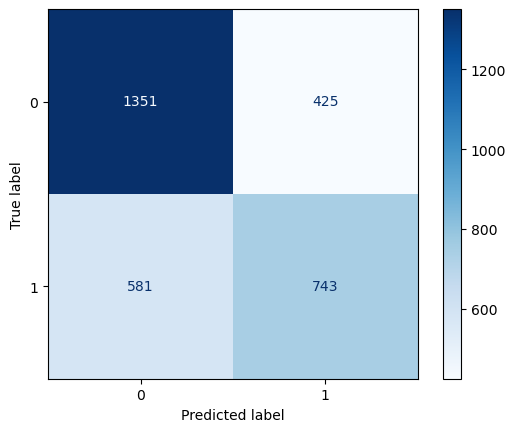

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = model.classes_)
plt = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model .classes_)
plt.plot(cmap = "Blues");

### Accuracy Metric

In [9]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
accuracy_score(y_pred, y_train)

0.675483870967742

### F1 Metric

In [10]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_train)
f1_score(y_pred, y_train)

0.5963081861958266